<a href="https://colab.research.google.com/github/KodaliSuchitraKamala/Decision_tree_and_Random_Forest_Classifications/blob/main/Program4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
# Step 1: Load CSV
df = pd.read_csv('heart_disease.csv')  # After uploading to Colab
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
# Step 2: Identify the target variable column name
# Print the available columns to check the correct name
print(df.columns)
# Assuming the target variable column is named 'target',
target_column = 'target'


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
# Step 3: Encode target variable
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])


In [ ]:
# Step 4: Prepare features and labels
X = df.drop(target_column, axis=1) # Drop the target column
y = df[target_column]


In [ ]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Step 6: Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)



In [ ]:
# Step 7: Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
# Step 8: Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Report:\n", classification_report(y_test, rf_pred))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# Correlation
print("\n----- CORRELATION MATRIX -----\n")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)



----- CORRELATION MATRIX -----

               age           sex            cp  trestbps      chol       fbs  \
age       1.000000  5.463991e-02  2.782128e-02  0.276506  0.037300  0.344288   
sex       0.054640  1.000000e+00  4.606822e-01  0.280791 -0.562479  0.327327   
cp        0.027821  4.606822e-01  1.000000e+00  0.511426 -0.386352  0.666667   
trestbps  0.276506  2.807906e-01  5.114257e-01  1.000000 -0.552509  0.697787   
chol      0.037300 -5.624790e-01 -3.863520e-01 -0.552509  1.000000 -0.223930   
fbs       0.344288  3.273268e-01  6.666667e-01  0.697787 -0.223930  1.000000   
restecg  -0.109280  5.238095e-01 -2.667108e-01 -0.068451 -0.054948 -0.218218   
thalach  -0.695302  1.777009e-01  1.266732e-01 -0.374300 -0.058384 -0.407164   
exang     0.208660 -5.091751e-01 -4.814815e-01 -0.356362  0.734902 -0.166667   
oldpeak  -0.268329  9.265768e-02  6.155734e-01  0.048022 -0.082238  0.080878   
slope    -0.015649 -2.182179e-01 -4.444444e-01 -0.078421 -0.038924 -0.250000   
ca     

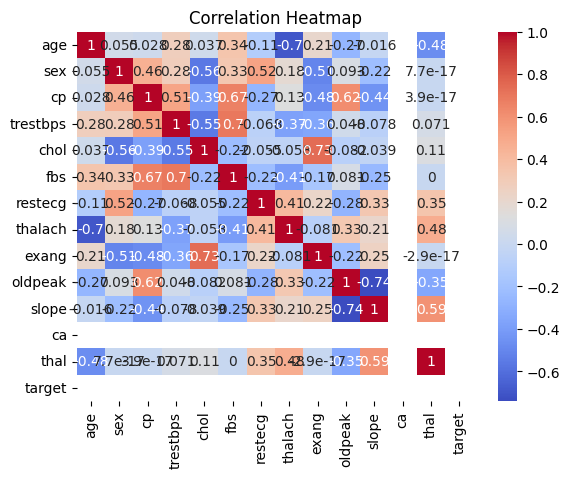

In [ ]:
# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
numerical_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']

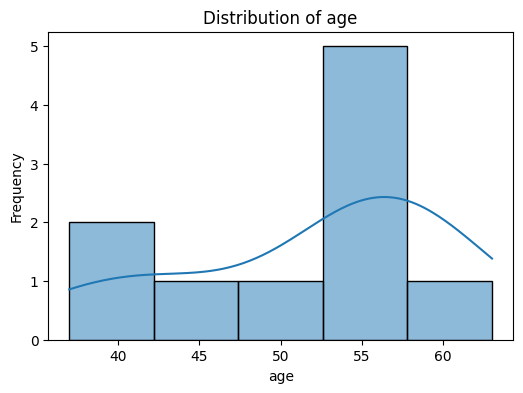

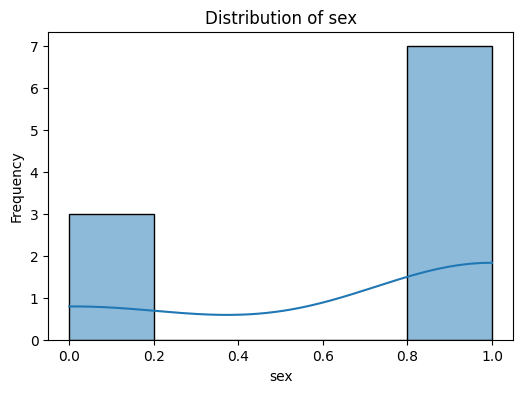

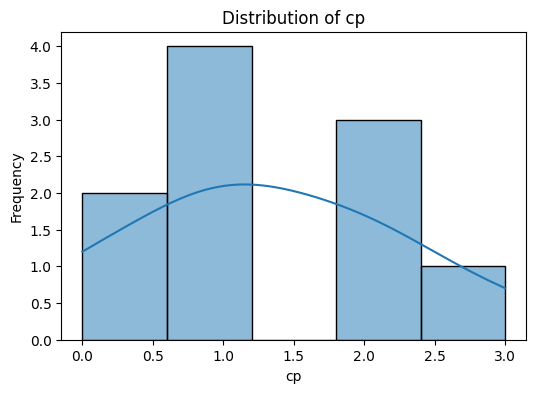

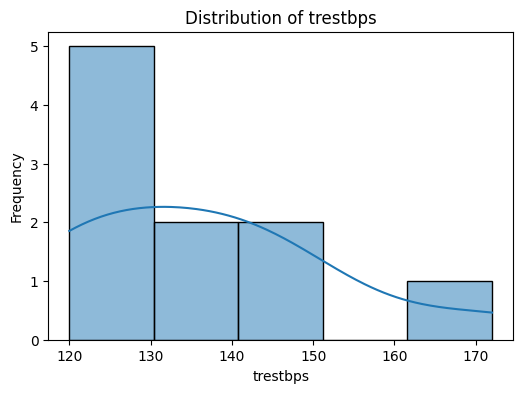

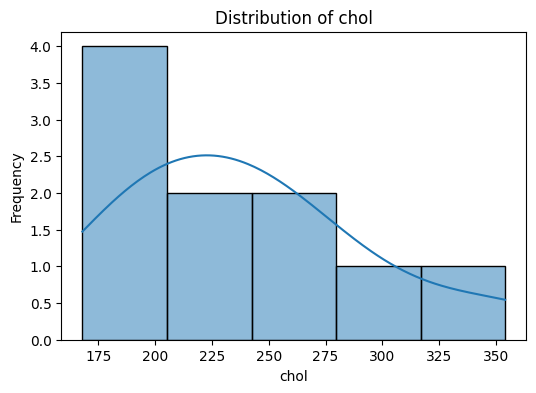

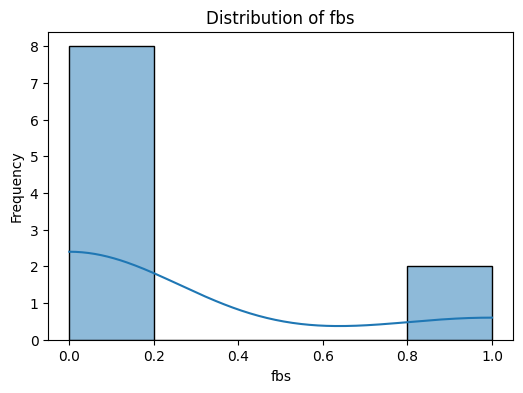

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
